# Machine Learning Projects Portofolio
### Ketentuan Tugas :
1. Dibebaskan untuk men-download Dataset dari Kaggle atau sumber data lainnya, pilih untuk kasus supervised atau unsupervised.
2. Buatlah End to end project Machine Learning di local jupyter notebook / Google Collaboratory.
3. Ganti nama file : template_pr_day10.ipynb  dengan PR_day10_nama_siswa.ipynb
4. Upload Dataset yang digunakan ke Kaggle
5. Upload file code dan ppt (jika ada) ke dalam github repository + file readme pada github.
6. Tugas ini bersifat individu, dikumpulkan ke LMS dalam bentuk **link githubnya saja**.

In [1]:
#Import libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Preprocessing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Handling Missing Value

In [5]:
data['wip'].fillna(0, inplace=True)

In [6]:
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [7]:
# data['date'] = pd.to_datetime(data['date'])

In [8]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


1. There are several columns such as wip, over_time, incentives, idle_time, idle_men, and no_of_workers with maximum values much higher than the 75th percentile.

2. The range of values for each column varies greatly, indicating the need for scaling.

3. Although the average idle time tends to be low, the maximum time limit of up to 300 minutes indicates the possibility of production disruptions or other problems that cause time loss. In addition, the limit on the number of unemployed workers of up to 45 people indicates potential inefficiencies in the use of labor or in the production process.

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
data['day'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month_name() 
# data['year'] = data['date'].dt.year
# data.drop(['date'], axis=1, inplace=True)

In [11]:
columns_names= data.columns
columns_names

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month'],
      dtype='object')

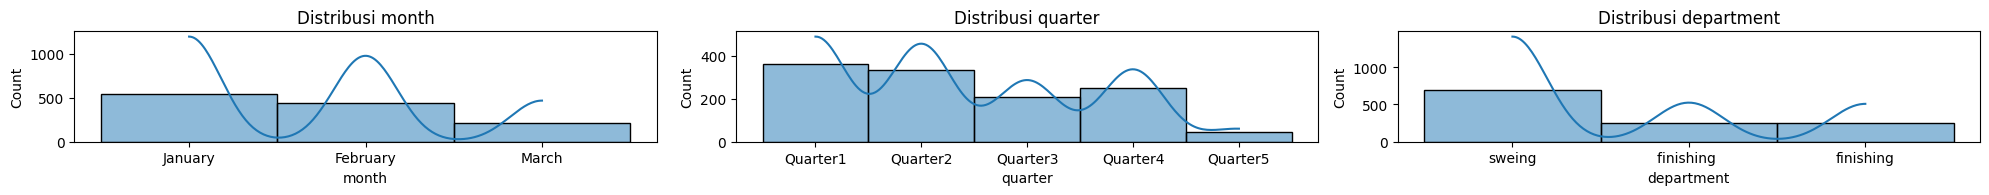

In [12]:
columns_categorical = ['month', 'quarter', 'department']
plt.figure(figsize=(20, 5))
for i, var in enumerate(columns_categorical, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribusi {var}')

plt.tight_layout()
plt.show()

1. Quarter : The highest quarter is quarter 1 then quarter 2, quarter 4, quarter 3 and finally quarter 5

2. Department: Sewing is higher than the finishing department

In [13]:
columns_numerical = ['smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers']

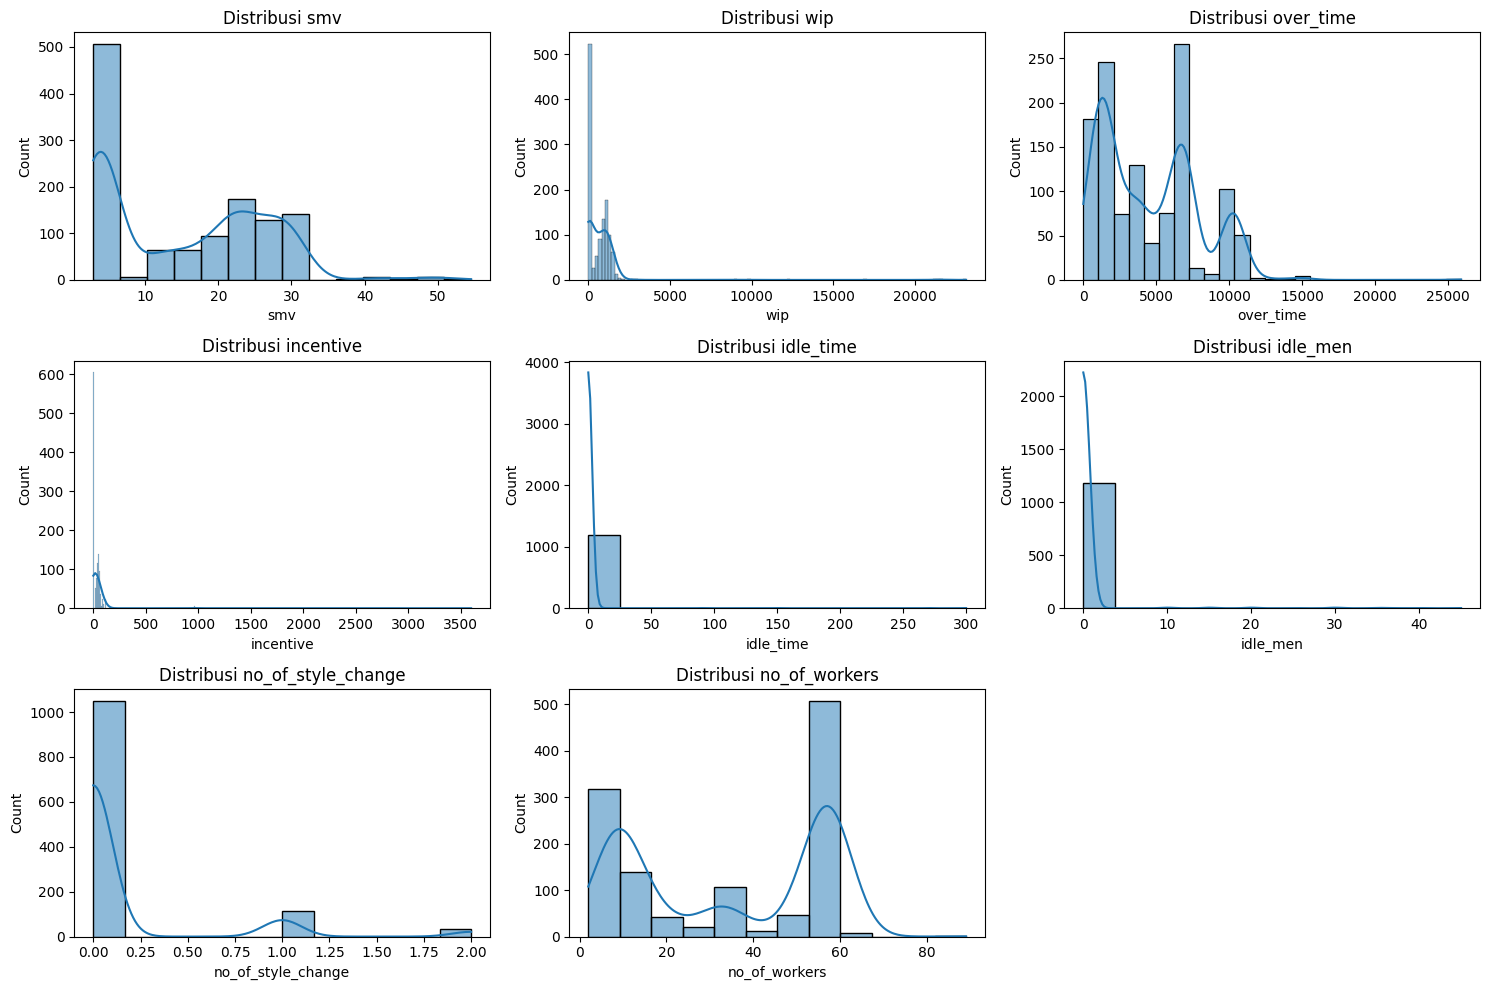

In [14]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(columns_numerical, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribusi {var}')

plt.tight_layout()
plt.show()

In [15]:
num_subplots = len(columns_names)
num_cols = 4
num_rows = (num_subplots + num_cols - 1) // num_cols

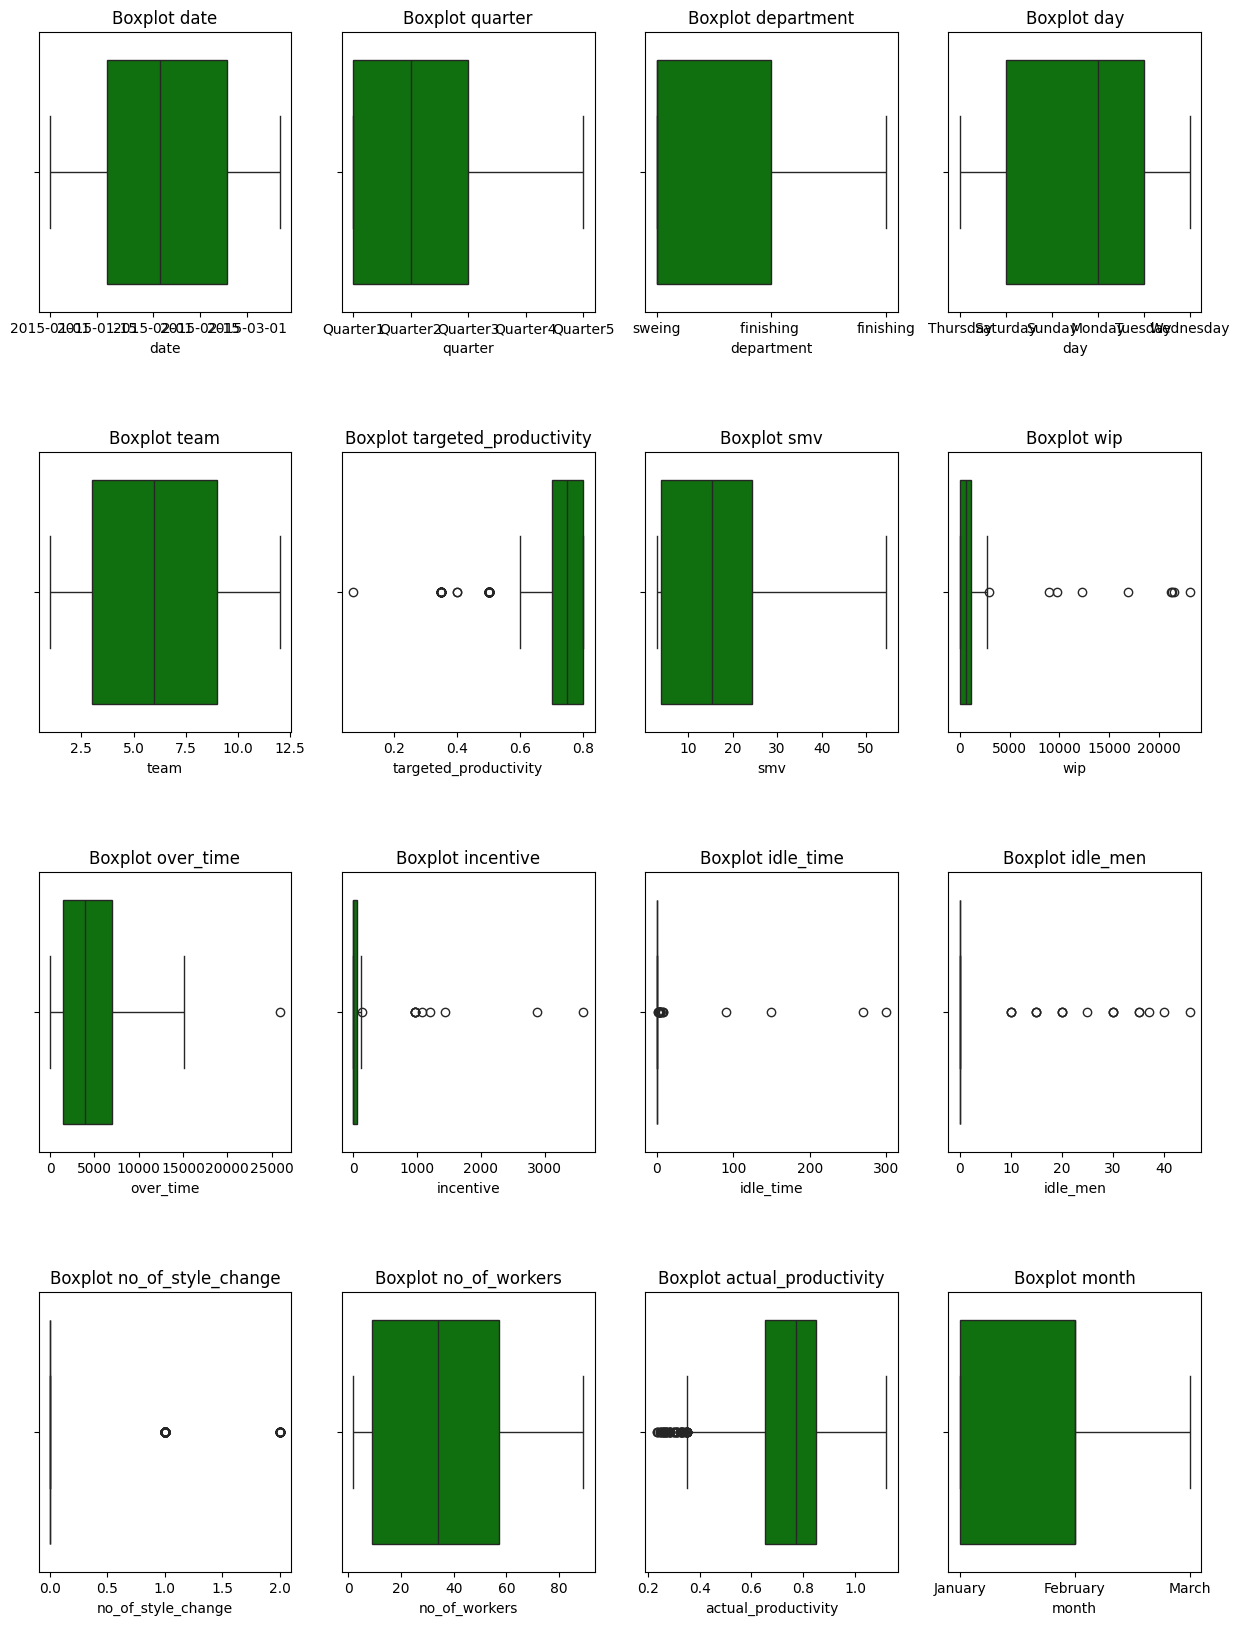

In [16]:
plt.figure(figsize=(15, 20))
for i, kolom in enumerate(columns_names, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[kolom], color='green')
    plt.title(f'Boxplot {kolom}')
    plt.xlabel(kolom)

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

In [17]:
data['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [18]:
data[data['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
498,2015-01-29,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230,January
499,2015-01-29,Quarter5,finishing,Thursday,4,0.80,4.30,0.0,1200,0,0.0,0,0,10.0,0.989000,January
500,2015-01-29,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186,January
501,2015-01-29,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800,January
502,2015-01-29,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130,January
503,2015-01-29,Quarter5,finishing,Thursday,6,0.50,2.90,0.0,1200,0,0.0,0,0,10.0,0.899000,January
504,2015-01-29,Quarter5,finishing,Thursday,8,0.65,4.15,0.0,960,0,0.0,0,0,8.0,0.877552,January
505,2015-01-29,Quarter5,finishing,Thursday,11,0.60,2.90,0.0,960,0,0.0,0,0,8.0,0.864583,January
506,2015-01-29,Quarter5,finishing,Thursday,10,0.80,3.94,0.0,1200,0,0.0,0,0,10.0,0.856950,January
507,2015-01-29,Quarter5,finishing,Thursday,1,0.75,3.94,0.0,1200,0,0.0,0,0,10.0,0.853667,January


In [19]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

The department column has a problem in that it has two different "finishing" values.

In [20]:
data["department"] = data["department"].apply(lambda x: x.strip())

In [21]:
condition_1 = data[data['actual_productivity'] > data['targeted_productivity']]
condition_1

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,January
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,January
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,2015-03-11,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051,March
1188,2015-03-11,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557,March
1189,2015-03-11,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505,March
1190,2015-03-11,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246,March


If we look at the table, almost all workers exceed the target productivity limit

In [22]:
condition_2 = data[data['targeted_productivity'] == data['actual_productivity']]
condition_2

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
163,2015-01-10,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8,January
182,2015-01-11,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8,January
183,2015-01-11,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8,January
207,2015-01-12,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8,January
229,2015-01-13,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8,January
855,2015-02-19,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7,February


only 6 lines, if we make the actual productivity the same as the target productivity

In [23]:
condition_3 = data[data['targeted_productivity'] > data['actual_productivity']]
condition_3

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
11,2015-01-01,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205,January
12,2015-01-01,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046,January
14,2015-01-01,Quarter1,finishing,Thursday,8,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.676667,January
15,2015-01-01,Quarter1,finishing,Thursday,4,0.75,3.94,0.0,2160,0,0.0,0,0,18.0,0.593056,January
16,2015-01-01,Quarter1,finishing,Thursday,7,0.80,2.90,0.0,960,0,0.0,0,0,8.0,0.540729,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,March
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,March
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,March
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,March


Even though the productivity target has been exceeded, there are still situations where the target is not achieved

Matrix Korelasi antar kolom 

In [24]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
matrix = numeric_data.corr()
(matrix)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389
over_time,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,0.053293,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.373908,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


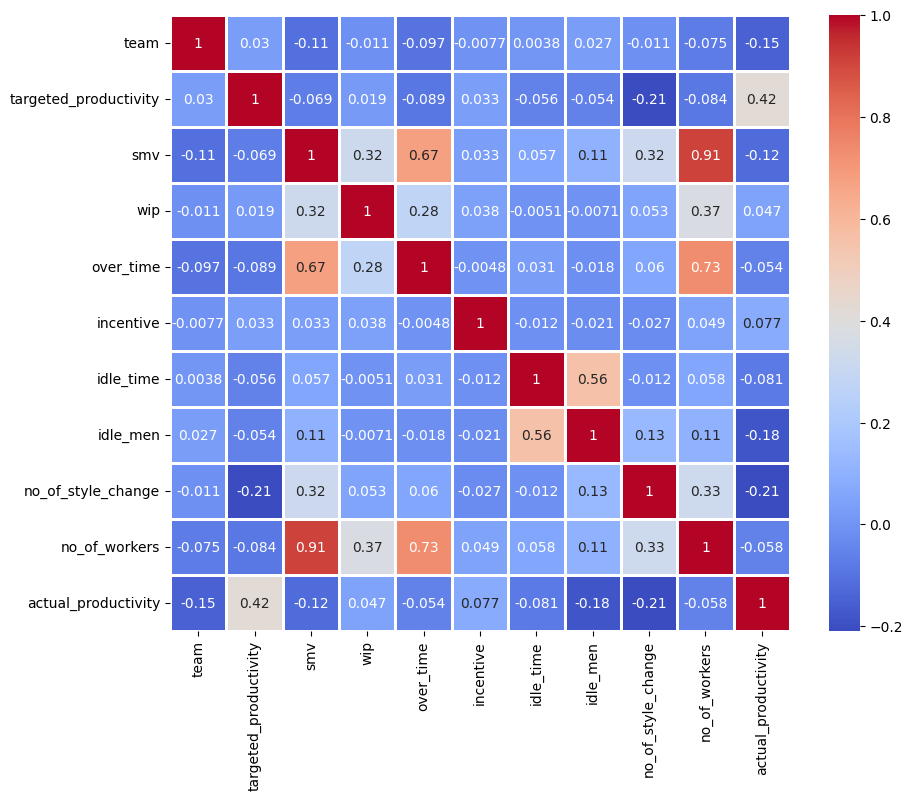

In [25]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(numeric_data.corr(), cmap = "coolwarm", annot=True, linewidth=2)

Label Encoding to change categorical type to numeric

In [26]:
label_encoder = LabelEncoder()
data['department'] = label_encoder.fit_transform(data['department'])
data['day'] = label_encoder.fit_transform(data['day'])
data['month'] = label_encoder.fit_transform(data['month'])
data['quarter'] = label_encoder.fit_transform(data['quarter'])
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,2015-01-01,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1
2,2015-01-01,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,2015-01-01,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,2015-01-01,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,2
1193,2015-03-11,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,2
1194,2015-03-11,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,2
1195,2015-03-11,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,2


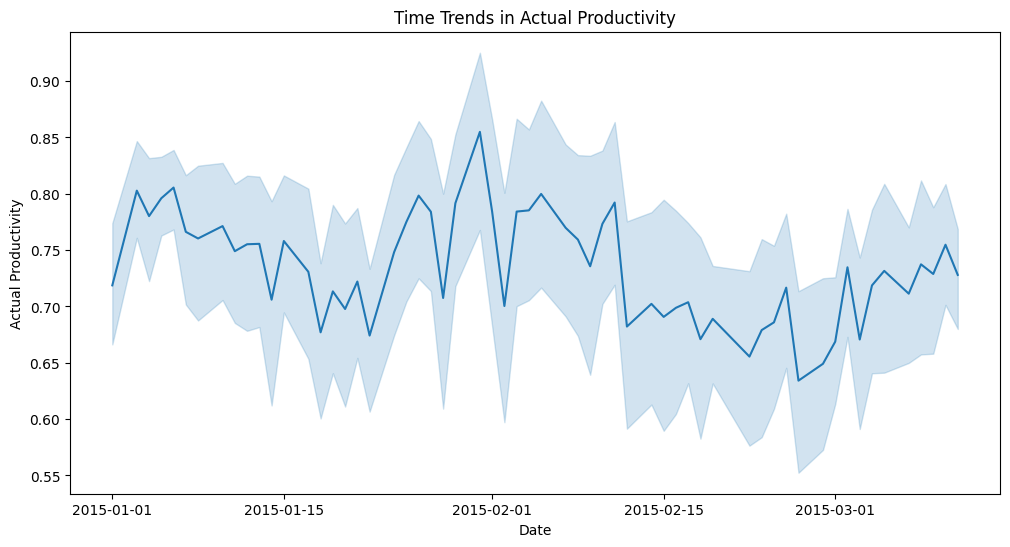

In [27]:
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='actual_productivity', data=data)

plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.title('Time Trends in Actual Productivity')

plt.show()

In [28]:
X = data.drop([ 'date' ,'actual_productivity'], axis = 1)
X

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month
0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,1
1,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,1
2,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
3,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1
4,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,2
1193,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,2
1194,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,2
1195,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,2


In [29]:
y = data['actual_productivity']
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# y_test.shape

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R2): {r2}')

    return y_pred  

linear_reg_model = LinearRegression()
print("Linear Regression Model:")
y_pred_linear_reg = evaluate_model(linear_reg_model, X_train_scaled, X_test_scaled, y_train, y_test)

decision_tree_model = DecisionTreeRegressor()
print("\nDecision Tree Regressor Model:")
y_pred_decision_tree = evaluate_model(decision_tree_model, X_train_scaled, X_test_scaled, y_train, y_test)

svr_model = SVR()
print("\nSupport Vector Regressor (SVR) Model:")
y_pred_svr = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test)

Linear Regression Model:
Mean Absolute Error (MAE): 0.10940138344029783
Mean Squared Error (MSE): 0.02329449985118401
Root Mean Squared Error (RMSE): 0.15262535782491718
R-squared (R2): 0.2206085076375769

Decision Tree Regressor Model:
Mean Absolute Error (MAE): 0.14717658084166668
Mean Squared Error (MSE): 0.0364259587847807
Root Mean Squared Error (RMSE): 0.1908558586598292
R-squared (R2): -0.2187461658061458

Support Vector Regressor (SVR) Model:
Mean Absolute Error (MAE): 0.11742755580239295
Mean Squared Error (MSE): 0.02278773234524006
Root Mean Squared Error (RMSE): 0.15095606097550393
R-squared (R2): 0.23756402440169244


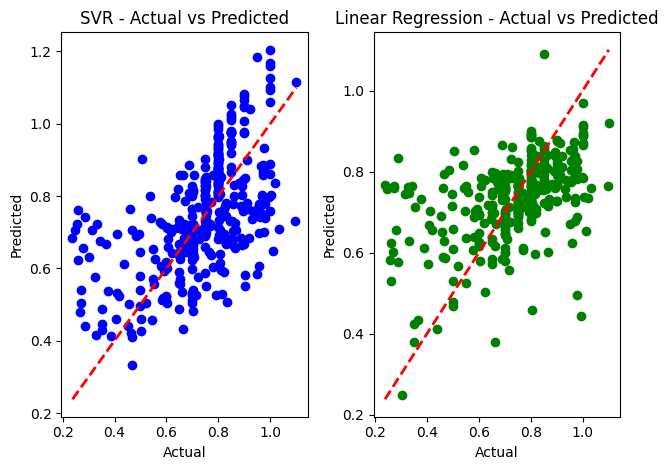

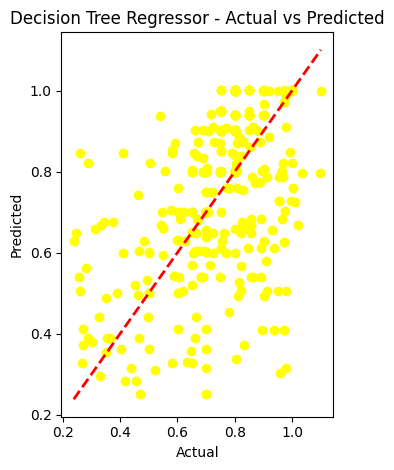

In [34]:
# Scatter plot of actual vs. actual values predicted values for the SVR model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted')

# Scatter plot of actual values and. predicted value for the Linear Regression model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_linear_reg, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Actual vs Predicted')

plt.tight_layout()
plt.show()

# Scatter plot of actual values and. predicted value for the Decision Tree Regressor model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_decision_tree, color='yellow')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor - Actual vs Predicted')

plt.tight_layout()
plt.show()

1. Linear Regression has good performance. This can be seen from the distribution plot which is close to the red diagonal line
2. Different from the Decision tree regressor model. This model has a distribution plot that is still far apart from the red diagonal line

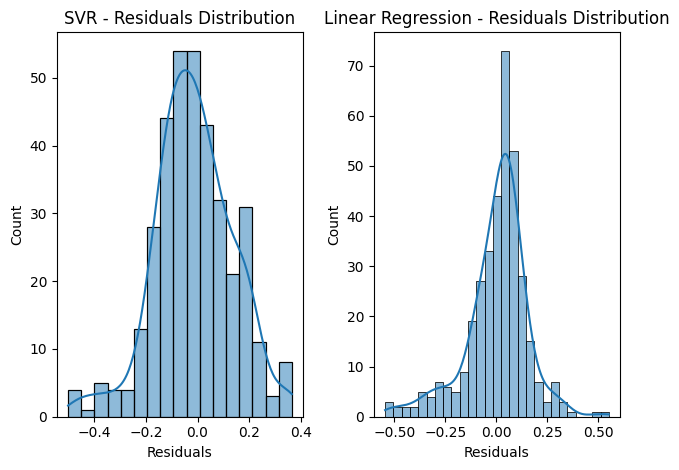

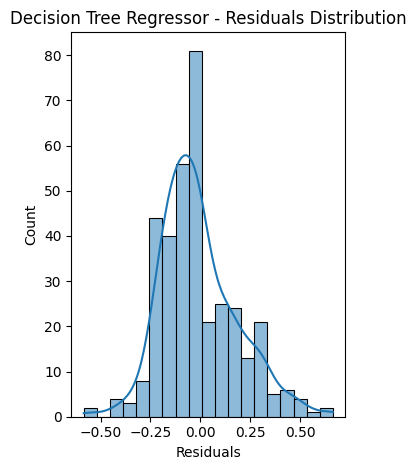

In [35]:
# Residual histogram (difference between actual value and predicted value) for the SVR model
plt.subplot(1, 2, 1)
residuals_svr = y_test - y_pred_svr
sns.histplot(residuals_svr, kde=True)
plt.title('SVR - Residuals Distribution')
plt.xlabel('Residuals')

# Residual histogram (difference between actual value and predicted value) for Linear Regression model
plt.subplot(1, 2, 2)
residuals_linear_reg = y_test - y_pred_linear_reg
sns.histplot(residuals_linear_reg, kde=True)
plt.title('Linear Regression - Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Residual histogram (difference between actual value and predicted value) for the Decision Tree Regressor model
plt.subplot(1, 2, 2)
residuals_linear_reg = y_test - y_pred_decision_tree
sns.histplot(residuals_linear_reg, kde=True)
plt.title('Decision Tree Regressor - Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

If you look at the linear regression model, this model has a shape like a normal distribution. This indicates that this model provides good estimates when compared to 2 other models, namely SVR and decision tree regressor